# LEAD SCORING CASE STUDY

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. __The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.__ The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case study
Build a __logistic regression__ model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### The solution is divided into the following sections:
- 1. Reading and Understanding the data
- 2. Data Cleaning
- 3. Exploratory Data Analysis
- 4. Data Preparation
- 5. Model Building and Training
- 6. Model Evaluation : Train set
- 7. Prediction based on the final model for the test set
- 8. Final Insights
- 9. Conclusion & Suggestions


In [1946]:
#### Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

## 1. Reading and Understanding the data

In [1947]:
lead = pd.read_csv("Leads.csv")

In [1948]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1949]:
lead.shape

(9240, 37)

In [1950]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1951]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1952]:
#Prospect ID and Lead Number these have unique values. Hence we can drop them as they are no use for our analysis.
print(sum(lead.duplicated(subset='Lead Number')))
print(sum(lead.duplicated(subset='Prospect ID')))

0
0


In [1953]:
lead = lead.drop(columns=['Prospect ID','Lead Number'],axis=1)

## 2. Data Cleaning

In [1954]:
# Check the null percent in each column
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [1955]:
#Let's drop columns with null values above 40%
lead = lead.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'],
        axis=1)


In [1956]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.0000

In [1957]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [1958]:
#Convert the 'Select' values in columns to np.nan
lead = lead.replace('Select',np.nan)

In [1959]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.0000

In [1960]:
#There are two more columns which have null more than 40% therfore dropping them as well.
lead = lead.drop(columns=['How did you hear about X Education','Lead Profile'],axis=1)

In [1961]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [1962]:
#Analysing each of the categorical columns for imputation
#1. City
lead.City.value_counts(dropna=False)


NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

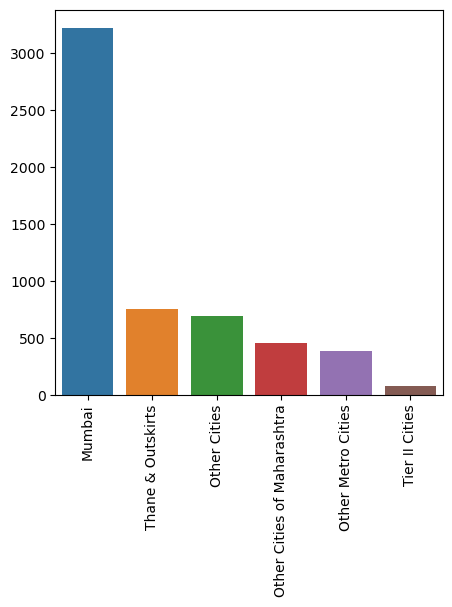

In [1963]:
plt.figure(figsize=(5,5))
sns.barplot(data=lead,x=lead.City.value_counts(dropna=False).index,y=lead.City.value_counts(dropna=False).values)
plt.xticks(rotation=90)
plt.show()

#### We can see that Mumbai has higher data points.
#### And also this column City has null percent close to 40 % and we cannot replace it with mode. Hence lets drop this column.

In [1964]:
lead = lead.drop(columns='City',axis=1)
len(lead.columns)

27

In [1965]:
#2.Specialization
lead.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1966]:
#Sometimes the lead may not have specified the specialization. Let's mark it as 'Not specified' for all the NaN values
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Not specified' )


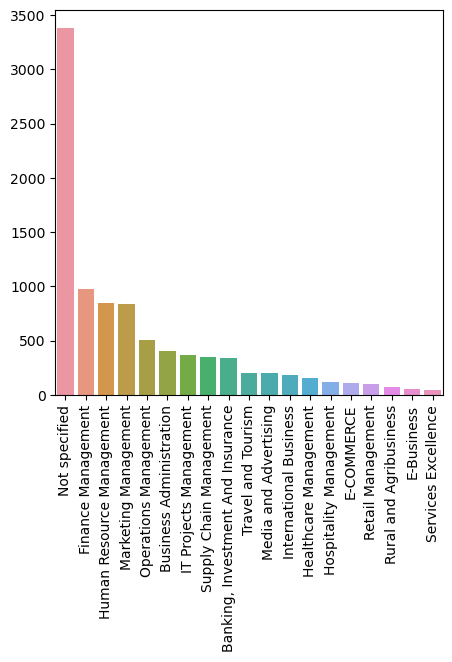

In [1967]:
plt.figure(figsize=(5,5))
sns.barplot(data=lead,x=lead.Specialization.value_counts(dropna=False).index,y=lead.Specialization.value_counts(dropna=False).values)
plt.xticks(rotation=90)
plt.show()

#### We can see that the management domain has higher data points. And the Not specified my be unemployed or Student leads.

In [1968]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1969]:
#3.Tags
lead.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### We can understand that this column is not clearly categorised instead has messages. This column will not help us for our model so lets drop the column.

In [1970]:
lead = lead.drop(columns='Tags',axis=1)

In [1971]:
len(lead.columns)

26

In [1972]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Search                                            0.0000

In [1973]:
#4.What matters most to you in choosing a course
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

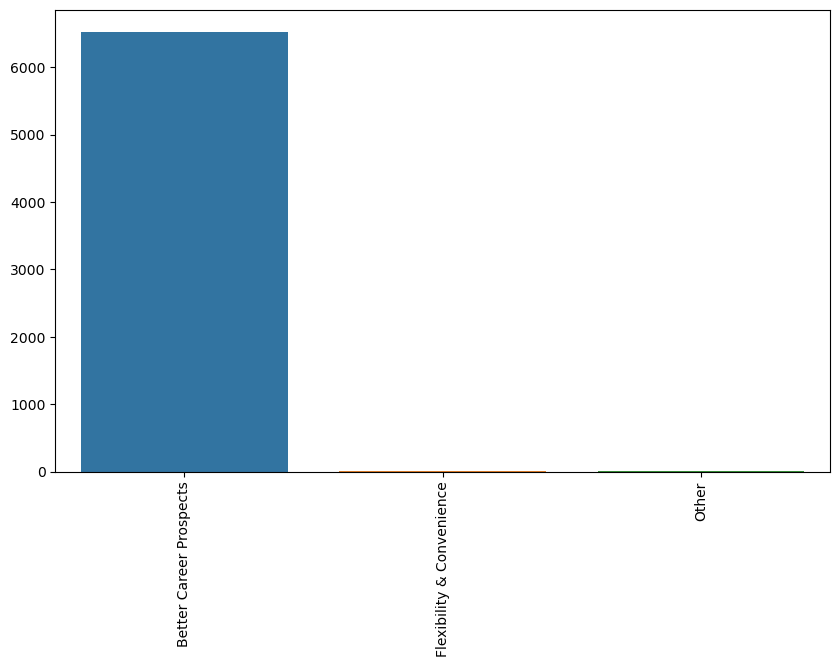

In [1975]:
plt.figure(figsize=(10,6))
sns.barplot(data=lead,x=lead['What matters most to you in choosing a course'].value_counts(dropna=False).index,
            y=lead['What matters most to you in choosing a course'].value_counts(dropna=False).values)
plt.xticks(rotation=90)
plt.show()

#### As we can see that the data points are skewed towards 'Better Career Prospects'. hence let us drop this column as well. Assuming every lead will opt for  'Better Career Prospects'.

In [1976]:
lead = lead.drop(columns='What matters most to you in choosing a course',axis=1)

In [1977]:
len(lead.columns)

25

In [1978]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

What is your current occupation             29.112554
Country                                     26.634199
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Lead Origin                                  0.000000
Newspaper                                    0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Search                                       0.000000
X Education Forums                           0.000000
Newspaper Article                            0.000000
Magazine                    

In [1979]:
#5.What is your current occupation 
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

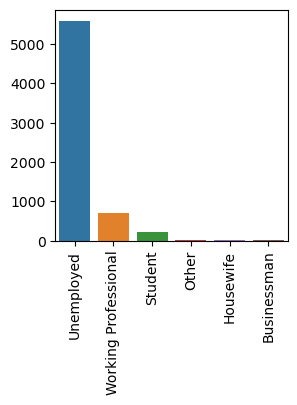

In [1980]:
plt.figure(figsize=(3,3))
sns.barplot(data=lead,x=lead['What is your current occupation'].value_counts(dropna=False).index,
            y=lead['What is your current occupation'].value_counts(dropna=False).values)
plt.xticks(rotation=90)
plt.show()

In [1981]:
#Let us replace Nan values in 'What is your current occupation' with 'Unknown'
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unknown')

In [1982]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1983]:
#6.Country 
lead['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

#### The data points are heavily skewed around 95% is mapped to India. Hence let us drop this column as well assuming the leads are from India alone.

In [1984]:
lead = lead.drop(columns = 'Country', axis = 1)
len(lead.columns)

24

In [1985]:
#7.Lead Source
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Here we can see that Nan values can be replaced with most occuring value i.e 'Google'

In [1986]:
lead['Lead Source'].mode()[0]

'Google'

In [1987]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,lead['Lead Source'].mode()[0])
lead['Lead Source'] = lead['Lead Source'].replace('google',lead['Lead Source'].mode()[0])

In [1988]:
lead['Lead Source'].value_counts(dropna=False)

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1989]:
# We can also combine other small categories into a single category called 'Other Source'
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Pay per Click Ads'
                                                  ,'blog','WeLearn','welearnblog_Home','youtubechannel','testone',
                                                  'Press_Release','NC_EDM'],'Other Source')


In [1990]:
#8.Last Activity
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### This is a same case as Lead Source. We will impute Nan values with most frequent value i.e 'Email Opened' 

In [1991]:
lead['Last Activity'].mode()[0]

'Email Opened'

In [1992]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,lead['Last Activity'].mode()[0])

In [1993]:
# Combine smaller categories to a single category

lead['Last Activity'] = lead['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam',
             'Visited Booth in Tradeshow','Resubscribed to emails'],'Other Activity')

In [1994]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other Activity                 21
Name: Last Activity, dtype: int64

In [1995]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Lead Origin                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Magazine                                    0.000000
Lead Source                                 0.000000
Search                                      0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.

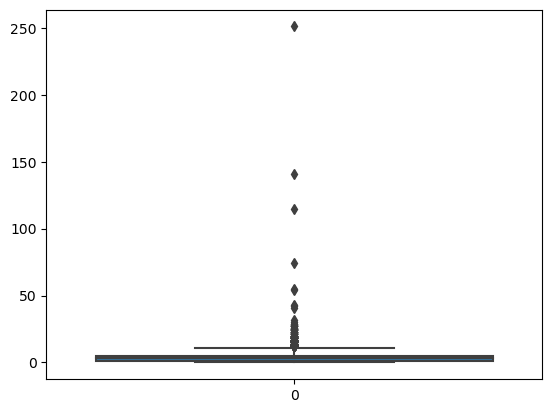

In [1996]:
#9. TotalVisits --numerical Column
# Since it is a numeric column we must understand if there are any outliers present or not before imputing mean or median values for Nan.
sns.boxplot(lead['TotalVisits'])
plt.show()

#### We can see that there are outliers present hence we will impute the nan with median and not mean.

In [1997]:
lead['TotalVisits'].median()

3.0

In [1998]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)

In [1999]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

Page Views Per Visit                        1.482684
Lead Origin                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Magazine                                    0.000000
Lead Source                                 0.000000
Search                                      0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.000000
Total Time Spent on Website                 0.

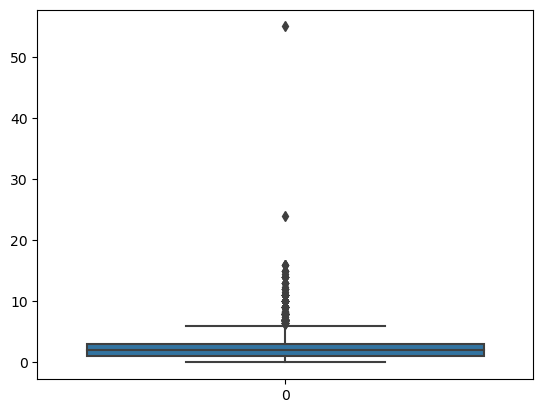

In [2000]:
#10. Page Views Per Visit - Numeric column
# Since it is a numeric column we must understand if there are any outliers present or not before imputing mean or median values for Nan.
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

#### We can see that there are outliers present hence we will impute the nan with median and not mean.

In [2001]:
lead['Page Views Per Visit'].median()

2.0

In [2002]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)

In [2003]:
((lead.isnull().sum()) * 100 /len(lead)).sort_values(ascending=False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

#### Now that we have no Null values in our dataset let us proceed with the EDA

## 3. Exploratory Data Analysis

### 1. Data Imbalance

In [2004]:
#Target variable is 'Converted'
lead.Converted.value_counts()
# 0 - No, not converted to lead
#1 - Yes, converted to lead

0    5679
1    3561
Name: Converted, dtype: int64

In [2005]:
index = lead['Converted'].astype('O').value_counts().index
values = lead['Converted'].astype('O').value_counts().values

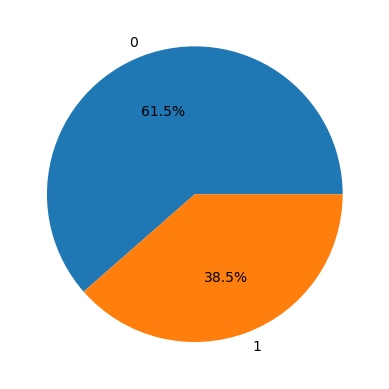

In [2006]:
plt.pie(x=values, labels= index.astype('O'),autopct='%1.1f%%')
plt.show()

#### We can se that around 38.8% have been converted to lead and 61.5% have not. So we can say that it is a balanced data set.

### 2.Univariate Analysis 
##### - Key Categorical Columns

In [2007]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

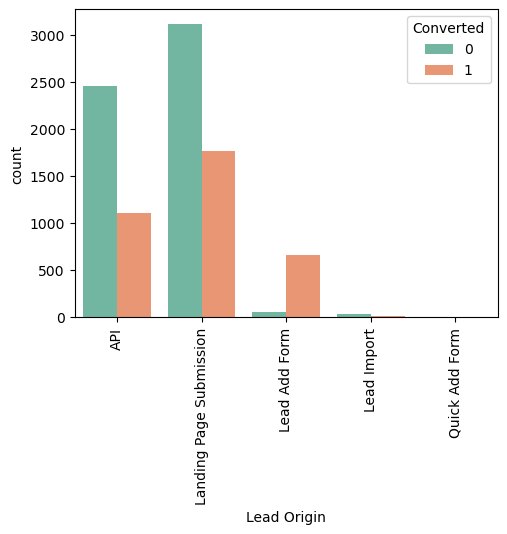

In [2008]:
#1. Lead Origin
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Lead Origin',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2009]:
#Lets see the conversion rates for each category
# total lead converted in the particular category / total len of the category
# Let us define a function for conversion rate calculation 
def percent(column,category):
    x = len(lead[(lead[column]==category) & (lead['Converted']==1)]) * 100 /len(lead[lead[column]==category])
    return print(category ,':',  x)

In [2010]:
percent('Lead Origin','Quick Add Form')
percent('Lead Origin','Lead Import')
percent('Lead Origin','API')
percent('Lead Origin','Lead Add Form')
percent('Lead Origin','Landing Page Submission')

Quick Add Form : 100.0
Lead Import : 23.636363636363637
API : 31.145251396648046
Lead Add Form : 92.47910863509749
Landing Page Submission : 36.18501841997544


#### Insights
- In the Lead Origin, Landing Page Submission has higher number of leads followed by API. 
- The leads converted is also high for Landing Page Submission and API.
- The Quick Add Form and Lead Add Form have a higher conversion but the lead count is less. It would be good for the business to focus in this area.


In [2011]:
#2.Lead Source
lead['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other Source          23
Name: Lead Source, dtype: int64

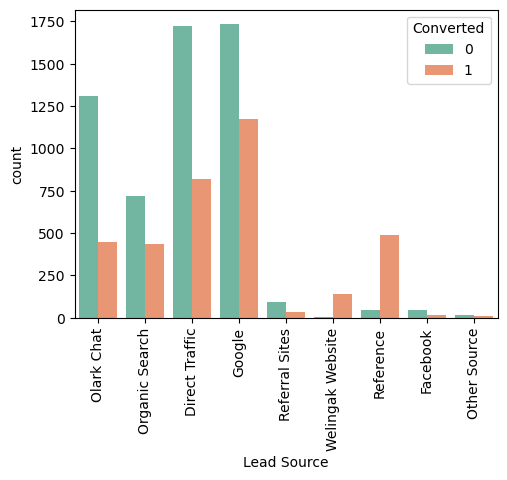

In [2012]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Lead Source',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2013]:
percent('Lead Source','Reference')
percent('Lead Source','Welingak Website')


Reference : 91.76029962546816
Welingak Website : 98.59154929577464


### Insights
- In the Lead Source, Google has the higher number of Leads followed by direct traffic and Organic Search.
- But categories like Reference and Welingak Website have lead conversion rate above 90% which must be strongly focused by the business.

In [2014]:
#3. Do Not Email
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

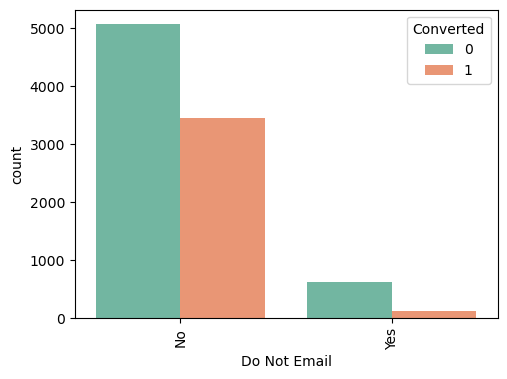

In [2015]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Do Not Email',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2016]:
percent('Do Not Email','No')
percent('Do Not Email','Yes')


No : 40.47731013402304
Yes : 16.076294277929154


### Insights
- In the Do Not Email, No category has higher data points than yes and also has higher lead conversion percent.
- Seems like lead wants to receive mails for them to be converted.

In [2017]:
#4. Last Activity
lead['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other Activity                 21
Name: Last Activity, dtype: int64

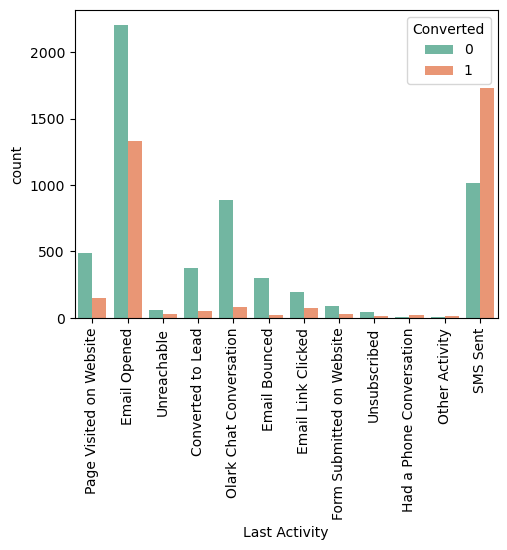

In [2018]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Last Activity',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2019]:
percent('Last Activity','SMS Sent')
percent('Last Activity','Had a Phone Conversation')
percent('Last Activity','Email Opened')


SMS Sent : 62.9143897996357
Had a Phone Conversation : 73.33333333333333
Email Opened : 37.68361581920904


### Insights
- In the Last Activity, Email Opened has higher number of Leads but the conversion rate is just 37%
- On the other hand SMS Sent and Had a Phone Conversation has a good conversion rate of 62% and 73%

In [2020]:
#5. Specialization
lead['Specialization'].value_counts()

Not specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

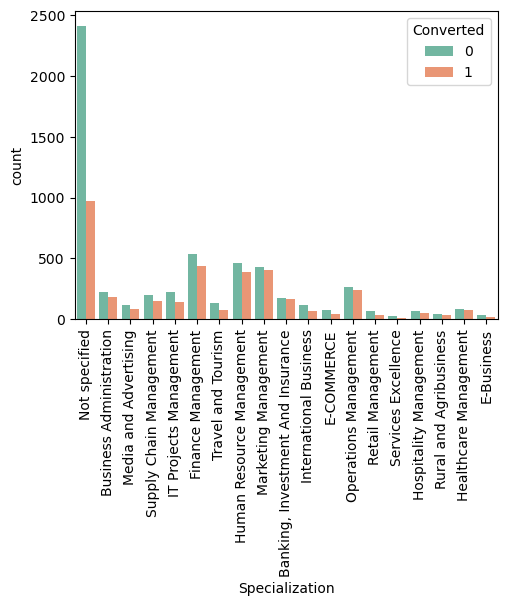

In [2021]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Specialization',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2022]:
percent('Specialization','Marketing Management')
percent('Specialization','Operations Management')
percent('Specialization','Finance Management')
percent('Specialization','Human Resource Management')
percent('Specialization','Not specified')


Marketing Management : 48.68735083532219
Operations Management : 47.31610337972167
Finance Management : 44.67213114754098
Human Resource Management : 45.75471698113208
Not specified : 28.668639053254438


### Insights
- In the Specialization, we can see that Marketing, Operation, Finance and HR Managements have good conversion rates.

In [2023]:
#6. What is your current occupation
# We can change the column name to Occupation
lead.rename(columns={'What is your current occupation':'Occupation'},inplace = True)

In [2024]:
lead.Occupation.value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

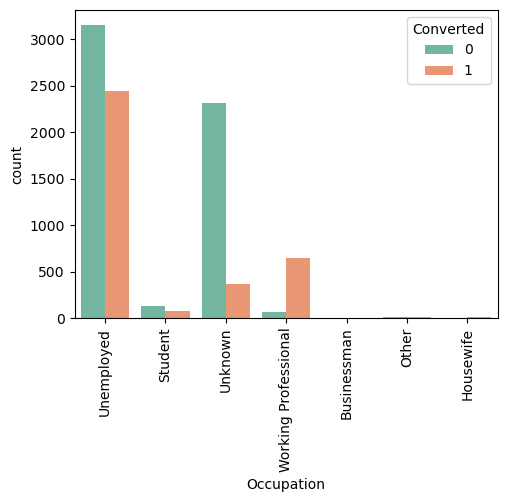

In [2025]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Occupation',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2026]:
percent('Occupation','Working Professional')
percent('Occupation','Housewife')
percent('Occupation','Unemployed')
percent('Occupation','Student')


Working Professional : 91.64305949008498
Housewife : 100.0
Unemployed : 43.589285714285715
Student : 37.142857142857146


###  Insights
- In the Occupation, we can clearly see that Working Professional has a higher lead conversion rate.
- And even though Housewife has low data points it has a conversion rate of 100%.
- Then we can focus on the category Student and Unemployed.

In [2027]:
# we can Rename column Through Recommendations
lead.rename(columns={'Through Recommendations':'Recommendation'},inplace = True)
lead['Recommendation'].value_counts()
# Data is highly skewed 

No     9233
Yes       7
Name: Recommendation, dtype: int64

In [2028]:
lead['Search'].value_counts()
# Data is highly skewed

No     9226
Yes      14
Name: Search, dtype: int64

In [2029]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [2030]:
# We can rename this column A free copy of Mastering The Interview
lead.rename(columns={'A free copy of Mastering The Interview':'Free_Copy'},inplace = True)
lead['Free_Copy'].value_counts()

No     6352
Yes    2888
Name: Free_Copy, dtype: int64

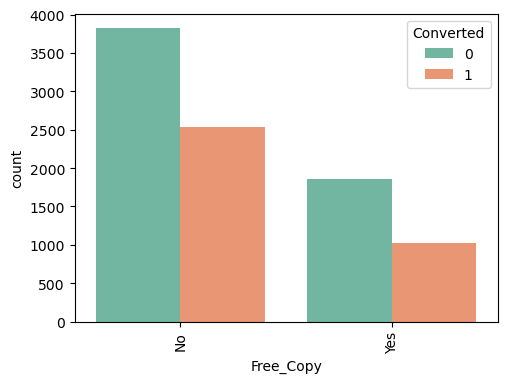

In [2031]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=lead,x='Free_Copy',hue='Converted',palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [2032]:
percent('Free_Copy','Yes')
percent('Free_Copy','No')

Yes : 35.664819944598335
No : 39.845717884130984


###   Insights
- In the Free_Copy, not much of a interesting insight the lead conversion rate for both are close to each other hence cannot conclude anything. 
- We can also drop this column as we are not able to get much info from this column.

### Remaining categorical columns are heavily skewed hence there will be no point in doing the Univariate analysis on them. Let us move to Numerical columns


In [2033]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Recommendation',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'Free_Copy',
       'Last Notable Activity'],
      dtype='object')

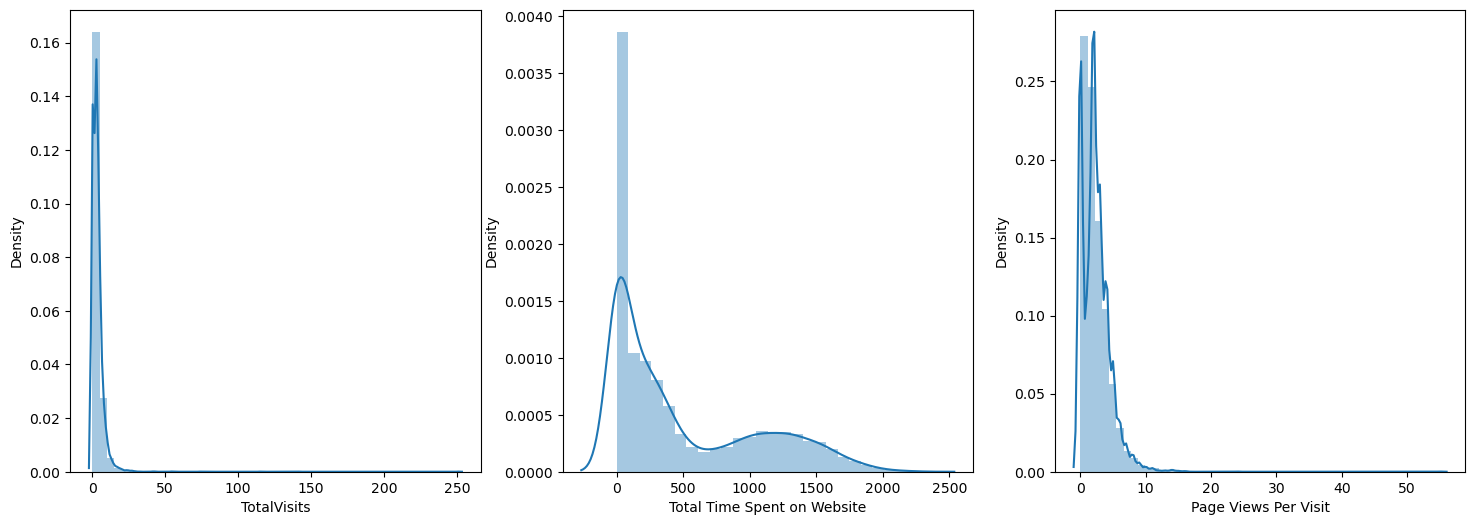

In [2034]:
# Numerical Columns are 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit'
numeric_cols = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']
plt.figure(figsize=(18,6))
i=1
for col in numeric_cols:
    plt.subplot(1,3,i)
    sns.distplot(lead[col])
    i+=1

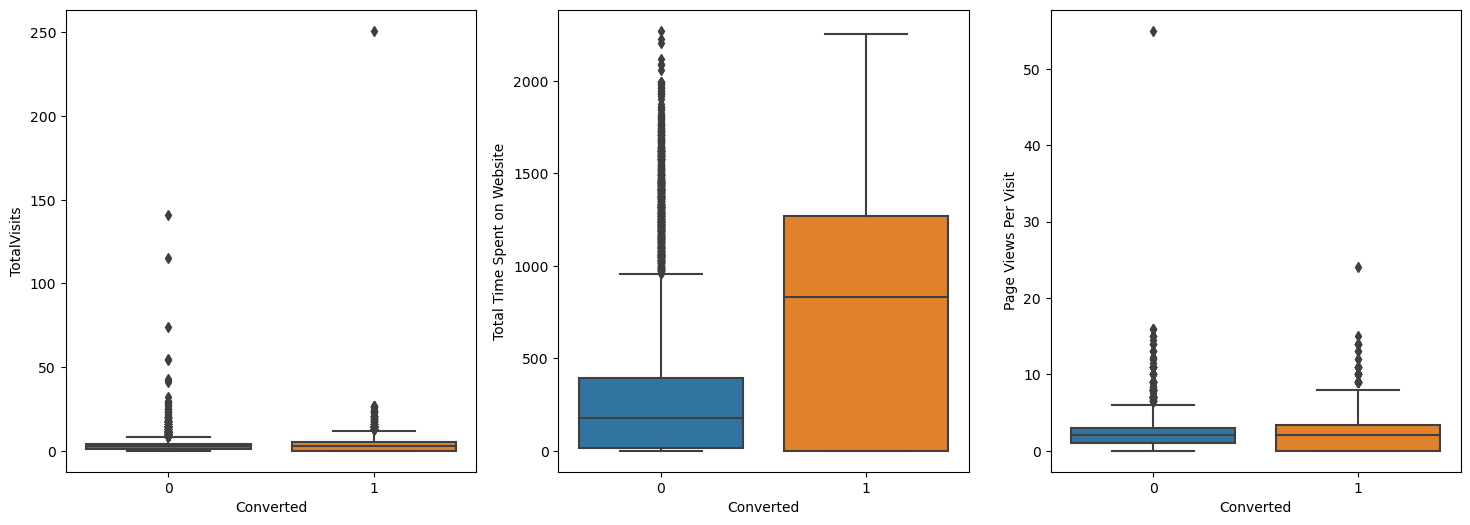

In [2035]:
plt.figure(figsize=(18,6))
i=1
for col in numeric_cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=lead[col],x=lead['Converted'])
    i+=1

### Insights
- We can observe that all the three numerical columns have outliers present.

### 3. Bivariate Analysis 

In [2036]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Recommendation',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'Free_Copy',
       'Last Notable Activity'],
      dtype='object')

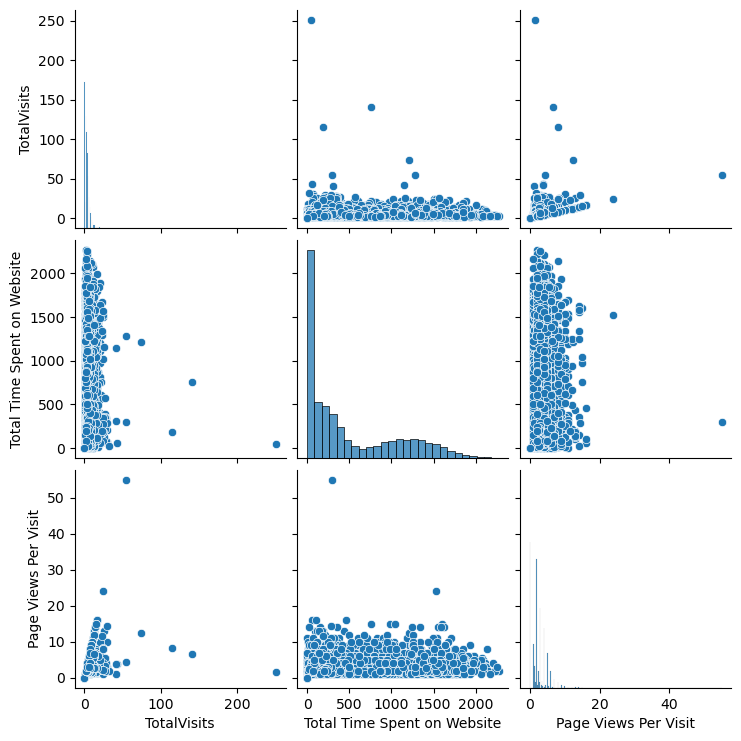

In [2037]:
numeric_cols = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']
sns.pairplot(lead[numeric_cols])
plt.show()

###  Insights
- We can observe that the diagonal graphs i.e graph(1,1),graph(2,2) and (3,3) it tells us that the data is not Normally distributed. 
- We can also observe that TotalVisits and Page Views Per Visit are slightly positively correlated.

In [2038]:
# Let us do the outlier treatment for the numerical columns


In [2039]:
lead['TotalVisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [2040]:
# Outlier treatment
# Let us remove data points from top 1% and 1% from the bottom
Quart3 = lead.TotalVisits.quantile(0.99)
lead = lead[lead['TotalVisits'] <= Quart3]
Quart1 = lead.TotalVisits.quantile(0.01)
lead = lead[lead['TotalVisits'] >= Quart1]


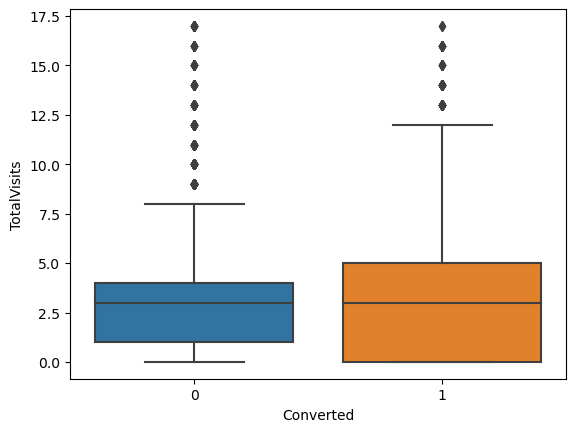

In [2041]:
sns.boxplot(y=lead['TotalVisits'],x=lead['Converted'])
plt.show()


In [2042]:
lead['Total Time Spent on Website'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

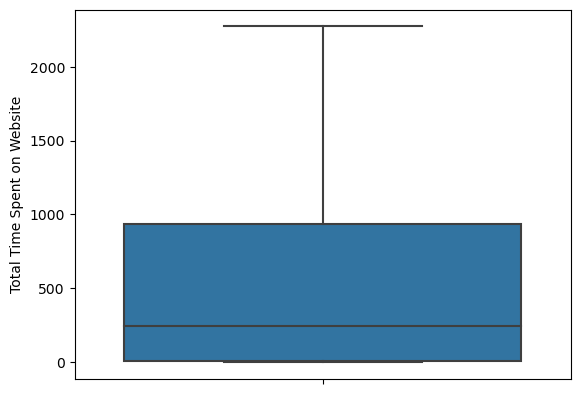

In [2043]:
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

# this does not need any outlier treatment.

In [2044]:
lead['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [2045]:
# Let us remove data points from top 1% and 1% from the bottom
Quart3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Quart3]
Quart1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Quart1]

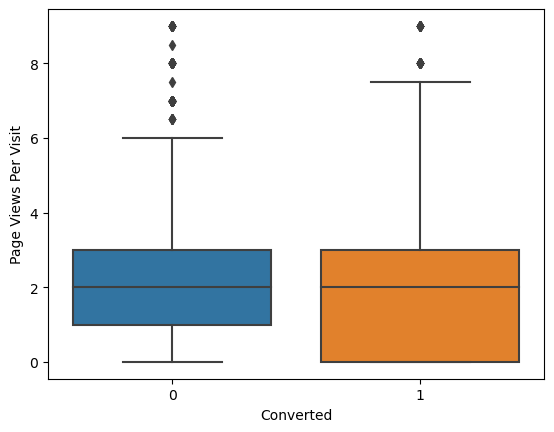

In [2046]:
sns.boxplot(y=lead['Page Views Per Visit'],x=lead['Converted'])
plt.show()


### 4. Multivariate Analysis

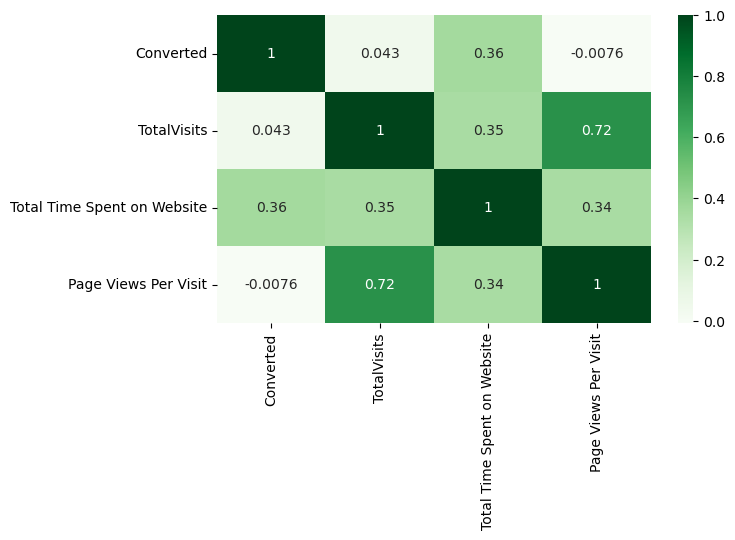

In [2047]:
plt.figure(figsize=(7,4))
sns.heatmap(lead.corr(),cmap='Greens',annot=True)
plt.show()

###   Insights
- We can  observe that TotalVisits and Page Views Per Visit are positively correlated.

In [2048]:
# Before moving on further let us drop few least important columns which has heavily skewed data points.
# let us also drop less informative cols like 'Last Notable Activity' and 'Free_Copy'

In [2049]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Recommendation',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'Free_Copy',
       'Last Notable Activity'],
      dtype='object')

In [2050]:
## Let us check the skewness before dropping columns

In [2051]:
lead['I agree to pay the amount through cheque'].value_counts()

No    9090
Name: I agree to pay the amount through cheque, dtype: int64

In [2052]:
lead['Get updates on DM Content'].value_counts()

No    9090
Name: Get updates on DM Content, dtype: int64

In [2053]:
lead['Update me on Supply Chain Content'].value_counts()

No    9090
Name: Update me on Supply Chain Content, dtype: int64

In [2054]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9090
Name: Receive More Updates About Our Courses, dtype: int64

In [2055]:
lead['Magazine'].value_counts()

No    9090
Name: Magazine, dtype: int64

In [2056]:
lead['Newspaper Article'].value_counts()

No     9089
Yes       1
Name: Newspaper Article, dtype: int64

In [2057]:
lead['Newspaper'].value_counts()

No     9089
Yes       1
Name: Newspaper, dtype: int64

In [2058]:
lead['X Education Forums'].value_counts()

No    9090
Name: X Education Forums, dtype: int64

In [2059]:
lead['Digital Advertisement'].value_counts()

No     9087
Yes       3
Name: Digital Advertisement, dtype: int64

In [2060]:
lead['Recommendation'].value_counts()

No     9084
Yes       6
Name: Recommendation, dtype: int64

In [2061]:
lead['Do Not Call'].value_counts()

No     9088
Yes       2
Name: Do Not Call, dtype: int64

In [2062]:
# cols to be dropped
cols = ['I agree to pay the amount through cheque','Recommendation','Digital Advertisement','X Education Forums','Newspaper'
    ,'Newspaper Article','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
       ,'I agree to pay the amount through cheque','Last Notable Activity','Do Not Call','Search','Free_Copy']

In [2063]:
len(cols)

15

In [2064]:
lead = lead.drop(columns=cols,axis=1)

### Final columns

In [2065]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

## 4. Data Preparation

In [2066]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed


In [2067]:
lead['Do Not Email'].value_counts()

No     8383
Yes     707
Name: Do Not Email, dtype: int64

In [2068]:
# Binary Encoding for some categorical columns.
lead['Do Not Email']=lead['Do Not Email'].map({'Yes':1,'No':0})

In [2069]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not specified,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed


In [2070]:
lead['Do Not Email'].value_counts()

0    8383
1     707
Name: Do Not Email, dtype: int64

#### Dummy variables creation 

In [2071]:
columns = ['Lead Origin','Lead Source','Last Activity','Specialization','Occupation']

In [2072]:
dum = pd.get_dummies(lead[columns],drop_first=True) 

In [2073]:
dum.shape

(9090, 47)

In [2074]:
# Concatinating the dum table with main data i.e lead data
lead = pd.concat([lead,dum],axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0


In [2075]:
lead = lead.drop(columns=['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'],axis=1)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2076]:
lead.shape

(9090, 52)

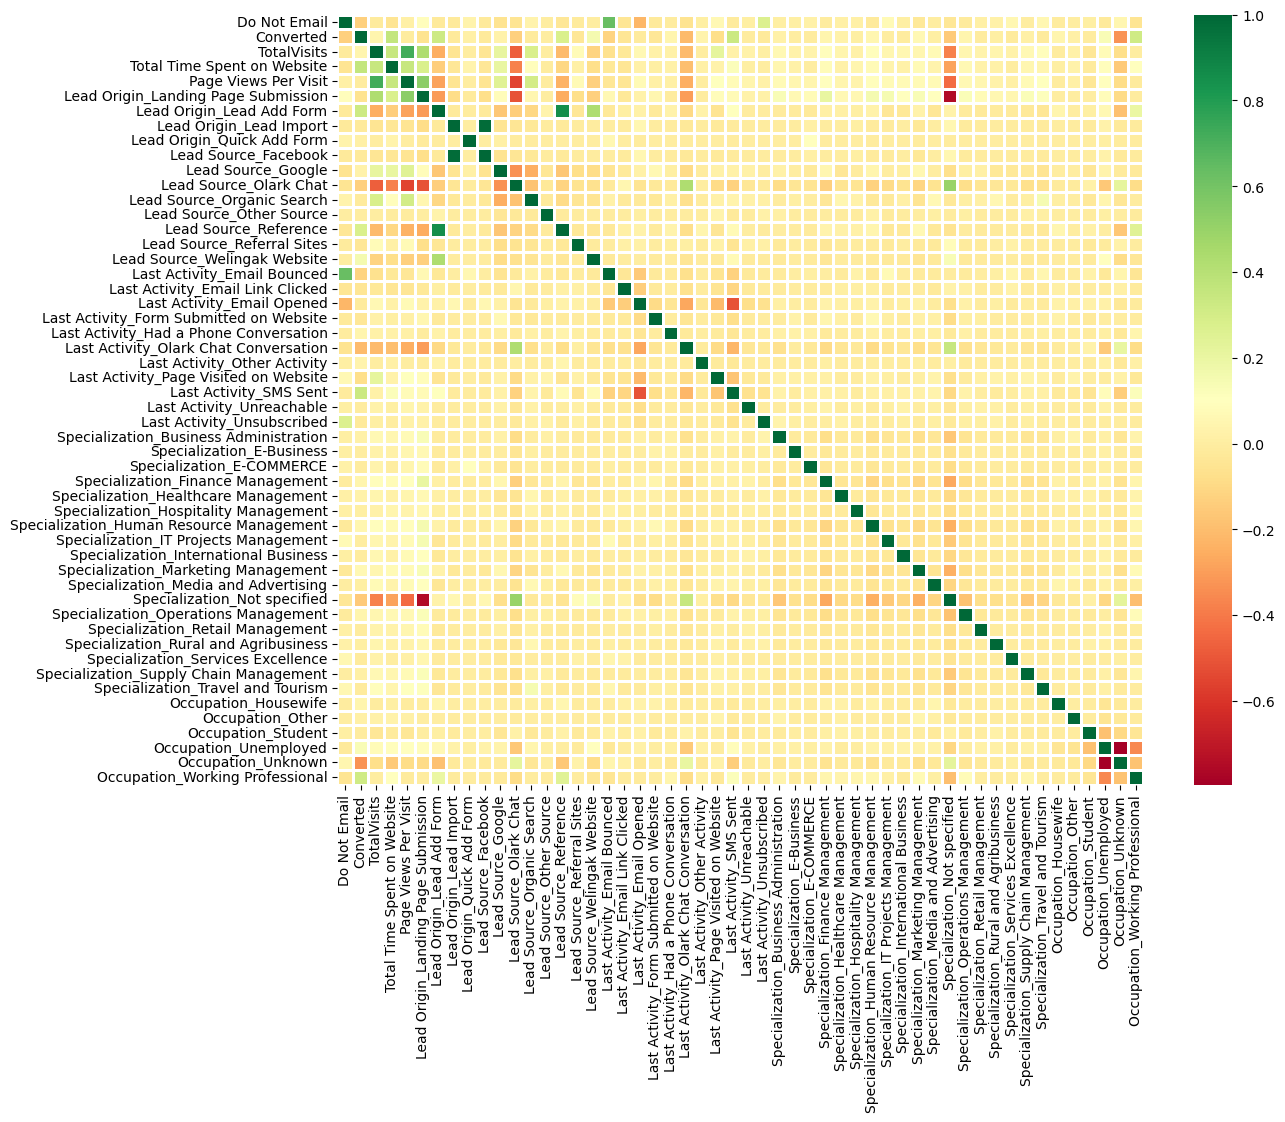

In [2077]:
# Let us visualize data using heat map
plt.figure(figsize=(13,10))
sns.heatmap(lead.corr(),cmap='RdYlGn',linewidths=1)
plt.show()

## 5. Model Building and Training

### Train- Test Split

In [2078]:
# Assign the variable X and y
X = lead.drop(columns=['Converted'],axis=1)
y = lead['Converted']

In [2079]:
# Split data into train- test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [2080]:
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6363, 51)
 Shape of y_train is :  (6363,)
 Shape of X_test is  :  (2727, 51)
 Shape of y_test is  :  (2727,)


In [2081]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
302,0,7.0,250,2.33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,1,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1033,0,5.0,470,5.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7656,1,6.0,352,6.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3241,0,4.0,973,1.33,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2082]:
# Scaling the columns using StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [2083]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,1,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7656,1,0.989402,-0.241619,2.014065,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3241,0,0.294642,0.897591,-0.492776,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2084]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
count,6363.000000,6.363000e+03,6.363000e+03,6.363000e+03,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,...,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000
mean,0.077165,7.816752e-17,3.126701e-17,-5.583394e-17,0.526167,0.078736,0.005658,0.000157,0.005815,0.319346,...,0.007701,0.004400,0.032532,0.021216,0.001414,0.001572,0.021688,0.602074,0.295458,0.077008
std,0.266874,1.000079e+00,1.000079e+00,1.000079e+00,0.499354,0.269348,0.075011,0.012536,0.076039,0.466260,...,0.087422,0.066195,0.177422,0.144116,0.037585,0.039615,0.145674,0.489508,0.456284,0.266625
min,0.000000,-1.094877e+00,-8.873549e-01,-1.206716e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.474975e-01,-8.671756e-01,-6.699187e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-5.273755e-02,-4.360736e-01,-1.331219e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,6.420224e-01,8.168741e-01,4.036749e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,4.810582e+00,3.280576e+00,3.624456e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Conversion rate

In [2085]:
convert = (sum(lead['Converted'])/len(lead['Converted'].index))*100
convert

38.448844884488445

### Model Building

In [2086]:
# Since we have huge number of columns we will use the Recursive Feature Elimination function to eliminate less important features.
#RFE
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=25)
rfe = rfe.fit(X_train,y_train)

In [2087]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True,  True])

In [2088]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Other Source', True, 1),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Vis

In [2089]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Other Source', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management', 'Specialization_Not specified',
       'Specialization_Retail Management', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed', 'Occupation_Unknown',
       'Occupation_Working Professional'],
      dtype='object')

In [2090]:
len(col)

25

### Model 1

In [2091]:
X_train_sm1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.4
Date:                Sat, 16 Dec 2023   Deviance:                       5076.9
Time:                        18:37:01   Pearson chi2:                 7.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4124
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Columns will be dropped based on 
 1. High p-value
 2. High VIF
 3. High GLM coeff
 4. Low Information value(IV)

In [2092]:
# Function for VIF
# Variance Inflation Factor check
# Define function for VIF calculation
def VIF_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values('VIF',ascending = False))

### Model 2

In [2093]:
# Dropping the column Occupation_Housewife as it has high p-value
X_train_sm2 = X_train_sm1.drop(columns=['Occupation_Housewife'],axis=1)

In [2094]:
logm2 = sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.4
Date:                Sat, 16 Dec 2023   Deviance:                       5082.9
Time:                        18:37:05   Pearson chi2:                 7.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [2095]:
#Creating a variable
X_train_rfe = X_train[col]
#Only keeping features of Model 8
X_train_rfe = X_train_rfe.drop(columns=['Occupation_Housewife']
                                        ,axis=1)

In [2096]:
VIF_cal(X_train_rfe)

                                  Features    VIF
21                   Occupation_Unemployed  10.73
2      Lead Origin_Landing Page Submission   7.42
22                      Occupation_Unknown   6.26
18            Specialization_Not specified   4.79
9               Last Activity_Email Opened   3.33
13                  Last Activity_SMS Sent   2.76
5                   Lead Source_Olark Chat   2.41
23         Occupation_Working Professional   2.16
3                Lead Origin_Lead Add Form   2.01
11   Last Activity_Olark Chat Conversation   1.97
20                      Occupation_Student   1.39
8             Lead Source_Welingak Website   1.34
0                             Do Not Email   1.32
1              Total Time Spent on Website   1.28
15              Last Activity_Unsubscribed   1.10
14               Last Activity_Unreachable   1.06
7               Lead Source_Referral Sites   1.05
4                     Lead Source_Facebook   1.04
16               Specialization_E-COMMERCE   1.02


### Model 3

In [2097]:
# Dropping the column Lead Source_Referral Sites as it has high p-value
X_train_sm3 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites'],axis=1)

In [2098]:
logm3 = sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.6
Date:                Sat, 16 Dec 2023   Deviance:                       5083.3
Time:                        18:37:09   Pearson chi2:                 7.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Model 4

In [2099]:
# Dropping the column Specialization_E-COMMERCE as it has high p-value
X_train_sm4 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE'],axis=1)

In [2100]:
logm4 = sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.2
Date:                Sat, 16 Dec 2023   Deviance:                       5084.4
Time:                        18:37:12   Pearson chi2:                 7.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4118
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Model 5

In [2101]:
# Dropping the column Lead Source_Facebook as it has high p-value
X_train_sm5 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE','Lead Source_Facebook'],axis=1)

In [2102]:
logm5 = sm.GLM(y_train,X_train_sm5,family=sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.0
Date:                Sat, 16 Dec 2023   Deviance:                       5086.0
Time:                        18:37:14   Pearson chi2:                 7.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4116
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [2103]:
#Creating a variable
X_train_rfe = X_train[col]
#Only keeping features of Model 8
X_train_rfe = X_train_rfe.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE','Lead Source_Facebook']
                                        ,axis=1)
VIF_cal(X_train_rfe)

                                  Features    VIF
18                   Occupation_Unemployed  10.58
2      Lead Origin_Landing Page Submission   7.30
19                      Occupation_Unknown   6.19
15            Specialization_Not specified   4.78
7               Last Activity_Email Opened   3.32
11                  Last Activity_SMS Sent   2.76
4                   Lead Source_Olark Chat   2.33
20         Occupation_Working Professional   2.14
3                Lead Origin_Lead Add Form   1.99
9    Last Activity_Olark Chat Conversation   1.97
17                      Occupation_Student   1.39
6             Lead Source_Welingak Website   1.34
0                             Do Not Email   1.32
1              Total Time Spent on Website   1.27
13              Last Activity_Unsubscribed   1.10
12               Last Activity_Unreachable   1.06
14   Specialization_Hospitality Management   1.02
16        Specialization_Retail Management   1.02
8   Last Activity_Had a Phone Conversation   1.02


In [2104]:
VIF_cal(X_train_rfe)

                                  Features    VIF
18                   Occupation_Unemployed  10.58
2      Lead Origin_Landing Page Submission   7.30
19                      Occupation_Unknown   6.19
15            Specialization_Not specified   4.78
7               Last Activity_Email Opened   3.32
11                  Last Activity_SMS Sent   2.76
4                   Lead Source_Olark Chat   2.33
20         Occupation_Working Professional   2.14
3                Lead Origin_Lead Add Form   1.99
9    Last Activity_Olark Chat Conversation   1.97
17                      Occupation_Student   1.39
6             Lead Source_Welingak Website   1.34
0                             Do Not Email   1.32
1              Total Time Spent on Website   1.27
13              Last Activity_Unsubscribed   1.10
12               Last Activity_Unreachable   1.06
14   Specialization_Hospitality Management   1.02
16        Specialization_Retail Management   1.02
8   Last Activity_Had a Phone Conversation   1.02


### Before dropping the column furthur based on p-value lets drop one very high VIF column i.e Occupation_Unemployed which also might make changes in p-values of other columns

### Model 6

In [2105]:
# Dropping the column Occupation_Unemployed as it has high p-value
X_train_sm6 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed'],axis=1)

In [2106]:
logm6 = sm.GLM(y_train,X_train_sm6,family=sm.families.Binomial())
res6 = logm6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.4
Date:                Sat, 16 Dec 2023   Deviance:                       5094.8
Time:                        18:37:18   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4108
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [2107]:
#Creating a variable
X_train_rfe = X_train[col]
#Only keeping features of Model 8
X_train_rfe = X_train_rfe.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed']
                                        ,axis=1)
VIF_cal(X_train_rfe)

                                  Features   VIF
2      Lead Origin_Landing Page Submission  3.05
15            Specialization_Not specified  2.79
7               Last Activity_Email Opened  2.58
11                  Last Activity_SMS Sent  2.26
4                   Lead Source_Olark Chat  2.18
9    Last Activity_Olark Chat Conversation  1.81
3                Lead Origin_Lead Add Form  1.69
18                      Occupation_Unknown  1.65
6             Lead Source_Welingak Website  1.32
0                             Do Not Email  1.29
1              Total Time Spent on Website  1.26
19         Occupation_Working Professional  1.22
13              Last Activity_Unsubscribed  1.10
12               Last Activity_Unreachable  1.04
17                      Occupation_Student  1.04
14   Specialization_Hospitality Management  1.02
16        Specialization_Retail Management  1.02
8   Last Activity_Had a Phone Conversation  1.01
5                 Lead Source_Other Source  1.01
10            Last A

### Model 7 

In [2108]:
# Dropping the column Occupation_Student as it has high p-value
X_train_sm7 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed','Occupation_Student'],axis=1)

In [2109]:
logm7 = sm.GLM(y_train,X_train_sm7,family=sm.families.Binomial())
res7 = logm7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.4
Date:                Sat, 16 Dec 2023   Deviance:                       5094.8
Time:                        18:37:22   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4108
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Model 8

In [2110]:
# Dropping the column Specialization_Retail Management as it has high p-value
X_train_sm8 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites',
                                        'Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management'],axis=1)

In [2111]:
logm8 = sm.GLM(y_train,X_train_sm8,family=sm.families.Binomial())
res8 = logm8.fit()
print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.7
Date:                Sat, 16 Dec 2023   Deviance:                       5097.4
Time:                        18:37:24   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4105
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [2112]:
#Creating a variable
X_train_rfe = X_train[col]
#Only keeping features of Model 8
X_train_rfe = X_train_rfe.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE',
                                        'Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management']
                                        ,axis=1)
VIF_cal(X_train_rfe)

                                  Features   VIF
2      Lead Origin_Landing Page Submission  3.00
15            Specialization_Not specified  2.77
7               Last Activity_Email Opened  2.58
11                  Last Activity_SMS Sent  2.25
4                   Lead Source_Olark Chat  2.17
9    Last Activity_Olark Chat Conversation  1.81
3                Lead Origin_Lead Add Form  1.69
16                      Occupation_Unknown  1.63
6             Lead Source_Welingak Website  1.32
0                             Do Not Email  1.29
1              Total Time Spent on Website  1.26
17         Occupation_Working Professional  1.22
13              Last Activity_Unsubscribed  1.10
12               Last Activity_Unreachable  1.04
14   Specialization_Hospitality Management  1.02
10            Last Activity_Other Activity  1.01
8   Last Activity_Had a Phone Conversation  1.01
5                 Lead Source_Other Source  1.01


### Model 9

In [2113]:
# Dropping the column Lead Source_Other Source as it has high p-value
X_train_sm9 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites',
                                        'Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management',
                                       'Lead Source_Other Source'],axis=1)

In [2114]:
logm9 = sm.GLM(y_train,X_train_sm9,family=sm.families.Binomial())
res9 = logm9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.0
Date:                Sat, 16 Dec 2023   Deviance:                       5099.9
Time:                        18:37:29   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4103
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [2115]:
#Creating a variable
X_train_rfe = X_train[col]
#Only keeping features of Model 8
X_train_rfe = X_train_rfe.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites','Specialization_E-COMMERCE',
                                        'Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management',
                                       'Lead Source_Other Source']
                                        ,axis=1)
VIF_cal(X_train_rfe)

                                  Features   VIF
2      Lead Origin_Landing Page Submission  3.00
14            Specialization_Not specified  2.77
6               Last Activity_Email Opened  2.58
10                  Last Activity_SMS Sent  2.25
4                   Lead Source_Olark Chat  2.17
8    Last Activity_Olark Chat Conversation  1.81
3                Lead Origin_Lead Add Form  1.68
15                      Occupation_Unknown  1.63
5             Lead Source_Welingak Website  1.32
0                             Do Not Email  1.29
1              Total Time Spent on Website  1.26
16         Occupation_Working Professional  1.22
12              Last Activity_Unsubscribed  1.10
11               Last Activity_Unreachable  1.04
13   Specialization_Hospitality Management  1.02
9             Last Activity_Other Activity  1.01
7   Last Activity_Had a Phone Conversation  1.01


### Model 10

In [2116]:
# Dropping the column Last Activity_Other Activity as it has high p-value
X_train_sm10 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites',
                                        'Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management',
                                       'Lead Source_Other Source',
                                       'Last Activity_Other Activity'],axis=1)

In [2117]:
logm10 = sm.GLM(y_train,X_train_sm10,family=sm.families.Binomial())
res10 = logm10.fit()
print(res10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.9
Date:                Sat, 16 Dec 2023   Deviance:                       5103.8
Time:                        18:37:33   Pearson chi2:                 7.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4100
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Model 11

In [2118]:
# Dropping the column Last Activity_Unreachable as it has high p-value
X_train_sm11 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites',
                                        'Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management',
                                       'Lead Source_Other Source',
                                       'Last Activity_Other Activity',
                                        'Last Activity_Unreachable'],axis=1)

In [2119]:
logm11 = sm.GLM(y_train,X_train_sm11,family=sm.families.Binomial())
res11 = logm11.fit()
print(res11.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.0
Date:                Sat, 16 Dec 2023   Deviance:                       5109.9
Time:                        18:37:33   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4094
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Model 12

In [2120]:
# Dropping the column Specialization_Hospitality Management as it has high p-value
X_train_sm12 = X_train_sm1.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites',
                                        'Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management',
                                       'Lead Source_Other Source',
                                       'Last Activity_Other Activity',
                                        'Last Activity_Unreachable',
                                        'Specialization_Hospitality Management'],axis=1)

In [2121]:
logm12 = sm.GLM(y_train,X_train_sm12,family=sm.families.Binomial())
res12 = logm12.fit()
print(res12.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.1
Date:                Sat, 16 Dec 2023   Deviance:                       5118.2
Time:                        18:37:34   Pearson chi2:                 7.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [2122]:
#Creating a variable
X_train_rfe = X_train[col]
#Only keeping features of Model 8
X_train_rfe = X_train_rfe.drop(columns=['Occupation_Housewife','Lead Source_Referral Sites',
                                        'Specialization_E-COMMERCE','Lead Source_Facebook','Occupation_Unemployed',
                                        'Occupation_Student','Specialization_Retail Management',
                                       'Lead Source_Other Source',
                                       'Last Activity_Other Activity',
                                        'Last Activity_Unreachable',
                                        'Specialization_Hospitality Management']
                                        ,axis=1)
VIF_cal(X_train_rfe)

                                  Features   VIF
2      Lead Origin_Landing Page Submission  2.89
11            Specialization_Not specified  2.73
6               Last Activity_Email Opened  2.51
9                   Last Activity_SMS Sent  2.20
4                   Lead Source_Olark Chat  2.17
8    Last Activity_Olark Chat Conversation  1.79
3                Lead Origin_Lead Add Form  1.67
12                      Occupation_Unknown  1.63
5             Lead Source_Welingak Website  1.32
0                             Do Not Email  1.29
1              Total Time Spent on Website  1.26
13         Occupation_Working Professional  1.21
10              Last Activity_Unsubscribed  1.10
7   Last Activity_Had a Phone Conversation  1.01


### Model 12 seems to be a good model having p-values of all features almost close to 0 and VIF less than 5.

In [2123]:
# Considering Model 12 

In [2124]:
# Getting the predicted values on the train set
y_train_pred = res12.predict(X_train_sm12)
y_train_pred[:10]

302     0.062251
6087    0.016551
1033    0.252904
7656    0.180234
3241    0.751495
5738    0.041343
7366    0.096239
3680    0.028033
4170    0.735057
43      0.058774
dtype: float64

In [2125]:
type(y_train_pred)

pandas.core.series.Series

In [2126]:
#Converting y_train_pred to a 1-D array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06225087, 0.01655097, 0.25290383, 0.18023379, 0.7514953 ,
       0.04134276, 0.09623943, 0.02803267, 0.73505667, 0.05877363])

In [2127]:
# Creating a Dataframe with y_train values as Converted , y_train_pred values as Converted probability 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID
0,0,0.062251,302
1,0,0.016551,6087
2,0,0.252904,1033
3,0,0.180234,7656
4,1,0.751495,3241


In [2128]:
# Assuming a threshold of 0.5 let us predict the lead will be converted or not using the Converted_Prob
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted
0,0,0.062251,302,0
1,0,0.016551,6087,0
2,0,0.252904,1033,0
3,0,0.180234,7656,0
4,1,0.751495,3241,1


## 6. Model Evaluation : Train set

In [2129]:
# Let us  create a confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3493,  442],
       [ 718, 1710]], dtype=int64)

In [2130]:
# Predicted     not_converted    converted
# Actual
# not_converted        3493 (TN)     442 (FP)
# converted            718 (FN)       1710  (TP)

In [2131]:
#Accuracy check
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)* 100)

81.76960553198177


#### 81.76% accuracy is good but just accuracy alone is not enough for checking the goodness of the model.

In [2132]:
# Creating variable for further calculations 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2133]:
#Sensitivity
round(TP / float(TP + FN)*100,2)

70.43

In [2134]:
#Specificity
round(TN/float(TN + FP)*100,2)

88.77

In [2137]:
# Calculate false postive rate
round(FP/ float(TN+FP)*100,2)

11.23

In [2138]:
# positive predictive value 
round(TP / float(TP+FP)*100,2)

79.46

In [2139]:
# Negative predictive value
round(TN / float(TN+ FN)*100,2)

82.95

### Let see the  ROC curve

In [2140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

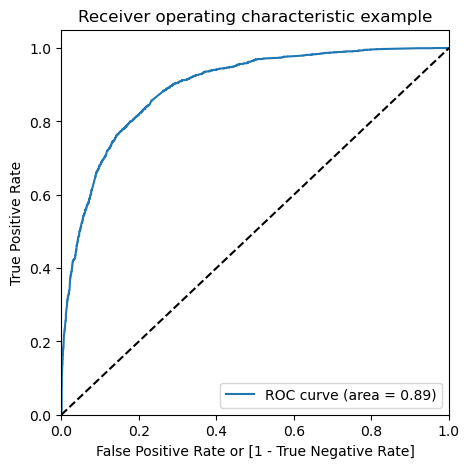

In [2142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding the optimal threshold

In [2143]:
#Finding Optimal Threshold Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062251,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016551,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.252904,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.180234,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.751495,3241,1,1,1,1,1,1,1,1,1,0,0


In [2144]:
cut_off = pd.DataFrame(columns=['accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num :
    cm = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total  = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) /total
    specificity = cm[0,0]/(cm[0,0] + cm[0,1])
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    
    cutoff_df.loc[i] = [i , accuracy, sensitivity, specificity]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.630206  0.977348  0.416010
0.2   0.2  0.763791  0.918040  0.668615
0.3   0.3  0.800723  0.844728  0.773571
0.4   0.4  0.816596  0.780890  0.838628
0.5   0.5  0.817696  0.704283  0.887675
0.6   0.6  0.801666  0.605025  0.922999
0.7   0.7  0.787207  0.530890  0.945362
0.8   0.8  0.760176  0.419687  0.970267
0.9   0.9  0.712557  0.265239  0.988564


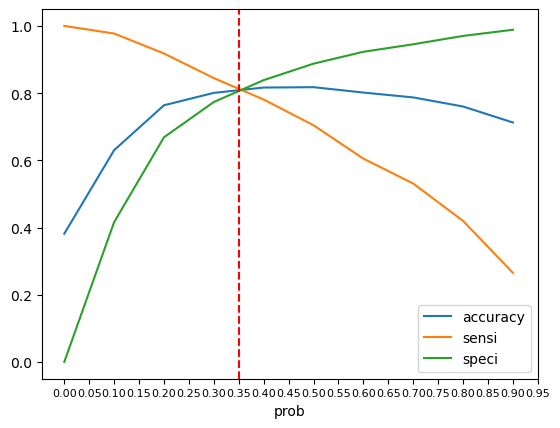

In [2145]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci']);
plt.axvline(x=0.35, color='r', linestyle='--') # additing axline;
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.show()

#### From the above graph we can take 0.35 as the threshold value and predict.

In [2146]:
# Taking threshold of 0.35 let us predict the lead will be converted or not using the Converted_Prob
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062251,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016551,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.252904,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.180234,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.751495,3241,1,1,1,1,1,1,1,1,1,0,0


In [2147]:
# Let us  create a confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3172,  763],
       [ 453, 1975]], dtype=int64)

In [2148]:
# Predicted     not_converted    converted
# Actual
# not_converted        3172 (TN)     763 (FP)
# converted            453 (FN)       1975  (TP)

In [2149]:
#Accuracy check
print(round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)* 100,2))

80.89


In [2150]:
# Creating variable for further calculations 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2151]:
#Sensitivity
round(TP / float(TP + FN)*100,2)

81.34

In [2152]:
#Specificity
round(TN/float(TN + FP)*100,2)

80.61

In [2153]:
# Calculate false postive rate
round(FP/ float(TN+FP)*100,2)

19.39

In [2154]:
# positive predictive value 
round(TP / float(TP+FP)*100,2)

72.13

In [2155]:
# Negative predictive value
round(TN / float(TN+ FN)*100,2)

87.5

In [2156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

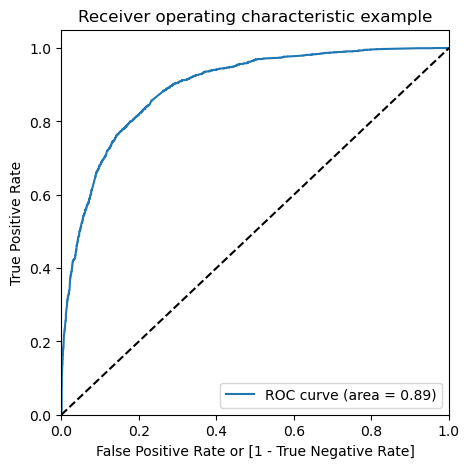

In [2157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Area under the curve value is 0.89 which is good.

### Precison and Recall for the train set

In [2158]:
confusion

array([[3172,  763],
       [ 453, 1975]], dtype=int64)

In [2159]:
# precision

round(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2)

72.13

In [2160]:
# recall

round(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2)

81.34

### Precision and Recall tradeoff

In [2161]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    1
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [2162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

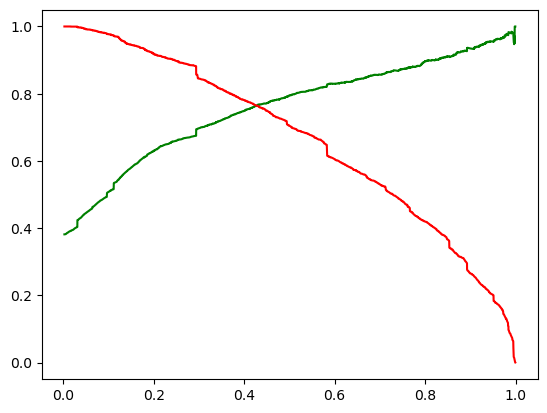

In [2163]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [2164]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','predicted']]
checking_test_df['predicted'].value_counts()

1    1975
0     453
Name: predicted, dtype: int64

In [2165]:
# check the precentage of final_predicted conversions on train data

round(1965/float(1965+463)*100,2)

80.93

#### We can see a conversion rate of 80.93% on the train set. Let us check it for the test set.

## 7. Prediction based on the final model for the test set

In [2166]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
6906,0,0.294642,1.919395,-0.133122,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1873,0,-0.400118,-0.546142,-0.133122,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
771,0,1.336782,-0.797465,2.550862,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4495,0,0.294642,-0.623190,0.940472,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9061,0,-0.400118,2.392690,-0.133122,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [2167]:
X_train_sm12.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Not specified',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [2168]:
cols = X_train_sm12.columns
cols = list(cols)
cols.remove('const')
cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Specialization_Not specified',
 'Occupation_Unknown',
 'Occupation_Working Professional']

In [2169]:
X_test = X_test[cols]

In [2170]:
# adding constant 
X_test_sm = sm.add_constant(X_test)

In [2171]:
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Not specified',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [2172]:
y_test_pred = res12.predict(X_test_sm)
y_test_pred[:10]

6906    0.900021
1873    0.216201
771     0.129241
4495    0.150846
9061    0.572836
4929    0.394974
2308    0.076320
1034    0.070419
9033    0.127653
7008    0.912170
dtype: float64

In [2173]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
6906,0.900021
1873,0.216201
771,0.129241
4495,0.150846
9061,0.572836


In [2174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [2175]:
# Putting CustID to index
y_test_df['Prospect_ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_ID,0
0,1,6906,0.900021
1,0,1873,0.216201
2,0,771,0.129241
3,0,4495,0.150846
4,1,9061,0.572836


In [2176]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob
0,6906,1,0.900021
1,1873,0,0.216201
2,771,0,0.129241
3,4495,0,0.150846
4,9061,1,0.572836


In [2177]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,final_predicted
0,6906,1,0.900021,1
1,1873,0,0.216201,0
2,771,0,0.129241,0
3,4495,0,0.150846,0
4,9061,1,0.572836,1


In [2178]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Prospect_ID,Converted,Converted_Prob,final_predicted,lead_score
0,6906,1,0.900021,1,90
1,1873,0,0.216201,0,22
2,771,0,0.129241,0,13
3,4495,0,0.150846,0,15
4,9061,1,0.572836,1,57
5,4929,1,0.394974,1,39
6,2308,0,0.076320,0,8
7,1034,0,0.070419,0,7
8,9033,0,0.127653,0,13
9,7008,1,0.912170,1,91


In [2179]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    858
0    209
Name: final_predicted, dtype: int64

In [2180]:
# check the precentage of final_predicted conversions on test data

round(858/float(858+209)*100,2)

80.41

#### The conversion rate for test set is also 80.41% which close to that of train set i.e 80.93% tells us that the model is a good one having good conversion rate

In [2181]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1339,  321],
       [ 209,  858]], dtype=int64)

### Overall Metrics check for the test set

In [2182]:
# precision

round(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,2)

72.77

In [2183]:
# recall

round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,2)

80.41

In [2184]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,2))

80.56


In [2185]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2186]:
# Sensitivity 
round(TP / float(TP+FN)*100,2)

80.41

In [2187]:
# Let us calculate specificity
round(TN / float(TN+FP)*100,2)

80.66

In [2188]:
# Negative predictive value
round(TN / float(TN+ FN)*100,2)

86.5

In [2189]:
# positive predictive value 
round(TP / float(TP+FP)*100,2)

72.77

In [2191]:
# Calculate false postive rate
round(FP/ float(TN+FP)*100,2)

19.34

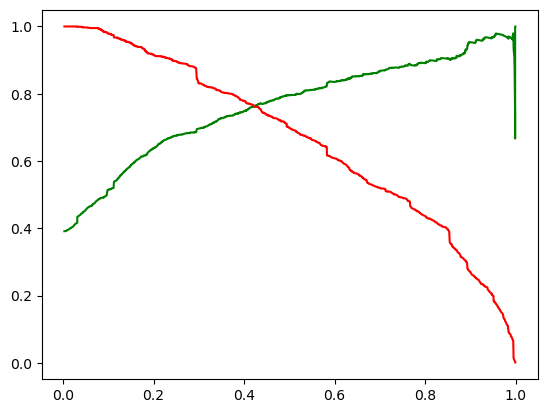

In [2192]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 8. Final Insights 

#  Train set

- Model Accuracy value is              :  80.89 %
- Model Sensitivity value is           :  81.34 %
- Model Specificity value is           :  80.61 %
- Model Precision value is             :  72.13 %
- Model Recall value is                :  81.34 %
- Model True Positive Rate (TPR)       :  81.34 %
- Model False Positive Rate (FPR)      :  19.39 %
- Model Poitive Prediction Value is    :  72.13 %
- Model Negative Prediction value is   :  87.5 %
- final lead conversion rate = 80.93%
    
# Test set 
- Model Accuracy value is              :  80.56 %
- Model Sensitivity value is           :  80.41 %
- Model Specificity value is           :  80.66 %
- Model Precision value is             :  72.77 %
- Model Recall value is                :  80.41 %
- Model True Positive Rate (TPR)       :  80.41 %
- Model False Positive Rate (FPR)      :  19.34 %
- Model Poitive Prediction Value is    :  72.77 %
- Model Negative Prediction value is   :  86.5 %
- final lead conversion rate = 80.41%


### Insights
- The Sensitivity value of test set and train set are almost same which tells us that the model is performing well on the test set aswell.

In [ ]:
y_pred_final.head()

#### With the help of the lead_score column we can now focus on the prospects who have high lead_score which shows higher potential for the convert to a lead.

In [2193]:
# final Prarmaters 
final_params = res12.params[1:]
final_params

Do Not Email                             -1.405174
Total Time Spent on Website               1.067576
Lead Origin_Landing Page Submission      -0.859597
Lead Origin_Lead Add Form                 2.911216
Lead Source_Olark Chat                    1.126509
Lead Source_Welingak Website              3.166861
Last Activity_Email Opened                0.604035
Last Activity_Had a Phone Conversation    1.995131
Last Activity_Olark Chat Conversation    -0.758546
Last Activity_SMS Sent                    1.815069
Last Activity_Unsubscribed                1.718154
Specialization_Not specified             -0.853253
Occupation_Unknown                       -1.198268
Occupation_Working Professional           2.378138
dtype: float64

#### Logistice regression formula
###### logit(p) = log(p/(1-p))= β0 + β1* X1 + … + βn * Xn

- Hence by substituting the coeff for each variable we will get the conversion probability.


#### NOTE : __With every linear increase in X, the increase in odds i.e(P/1-P ) is multiplicative__. 

## 9. Conclusion & Suggestions 
- We can clearly see that a Lead who uses Welingak Website has the highest coeff.
- And the lead who is identified by Add form should also be focused on as they hihger probability of converting to lead.
- And even when the lead is working professional there is good chance for the prospect to convert to lead.
- And when the prospect prefers DO NOT EMAIL, then there is very low probabiltity for converting to lead.
- And if the Occupation of the lead is unknown then it is most likely tthe prospect would not convert to a lead.


#### Hence the company can focus on these key features for maixmum conversion rates 

# THANK YOU 